Submission Dicoding: Belajar Machine Learning Untuk Pemula

Nama: Indah Mutiah Utami.MZ 

No. registrasi: 0182180260-3 

email : indahmutiahmz@gmail.com

In [ ]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-11 09:29:57--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.41MB/s    in 66s     

2021-07-11 09:31:04 (4.65 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile, os

In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


base_dir = '/tmp/rockpaperscissors/'
image_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
os.listdir(base_dir)

['rock', 'paper', 'rps-cv-images', 'README_rpc-cv-images.txt', 'scissors']

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
!pip install split_folders

In [ ]:
import splitfolders
splitfolders.ratio(image_dir, output = base_dir, seed = 1337,ratio=(0.6,0.4))

Copying files: 2188 files [00:00, 2833.41 files/s]


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   rotation_range = 20, 
                                   horizontal_flip = True, 
                                   shear_range=0.2, 
                                   fill_mode='nearest') 

test_datagen = ImageDataGenerator(rescale = 1./255, 
                                  rotation_range = 20, 
                                  horizontal_flip = True, 
                                  shear_range=0.2,
                                  fill_mode='nearest')

In [ ]:
train_gen = train_datagen.flow_from_directory(train_dir, 
                                              target_size=(150, 150), 
                                              batch_size=4, 
                                              class_mode='categorical')

validation_gen = test_datagen.flow_from_directory(validation_dir, 
                                                  target_size=(150, 150), 
                                                  batch_size=4, 
                                                  class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_gen,
      steps_per_epoch=25, 
      epochs=25,
      validation_data=validation_gen, 
      verbose=2)

Epoch 1/25
25/25 - 23s - loss: 1.1311 - accuracy: 0.3000 - val_loss: 1.0978 - val_accuracy: 0.4235
Epoch 2/25
25/25 - 22s - loss: 1.0997 - accuracy: 0.3900 - val_loss: 1.0969 - val_accuracy: 0.4189
Epoch 3/25
25/25 - 22s - loss: 1.0972 - accuracy: 0.3600 - val_loss: 1.0863 - val_accuracy: 0.4817
Epoch 4/25
25/25 - 22s - loss: 1.0974 - accuracy: 0.3800 - val_loss: 1.0984 - val_accuracy: 0.3322
Epoch 5/25
25/25 - 22s - loss: 1.0959 - accuracy: 0.4400 - val_loss: 1.0520 - val_accuracy: 0.4281
Epoch 6/25
25/25 - 22s - loss: 0.9211 - accuracy: 0.5100 - val_loss: 0.7701 - val_accuracy: 0.6735
Epoch 7/25
25/25 - 23s - loss: 0.6718 - accuracy: 0.7700 - val_loss: 0.4524 - val_accuracy: 0.8493
Epoch 8/25
25/25 - 22s - loss: 0.5751 - accuracy: 0.7600 - val_loss: 0.5046 - val_accuracy: 0.8208
Epoch 9/25
25/25 - 23s - loss: 0.4740 - accuracy: 0.8000 - val_loss: 0.4760 - val_accuracy: 0.8253
Epoch 10/25
25/25 - 23s - loss: 0.4178 - accuracy: 0.8900 - val_loss: 0.6274 - val_accuracy: 0.7717
Epoch 11/

Saving asi6ZQCskd51eHm1.png to asi6ZQCskd51eHm1.png
asi6ZQCskd51eHm1.png
scissor


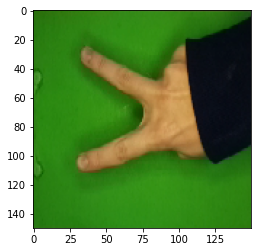

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  result = classes.argmax(axis=-1)

  print(fn)
  if result==0:
    print('paper')
  elif result==1:
    print('rock')
  elif result==2:
    print('scissor')